In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

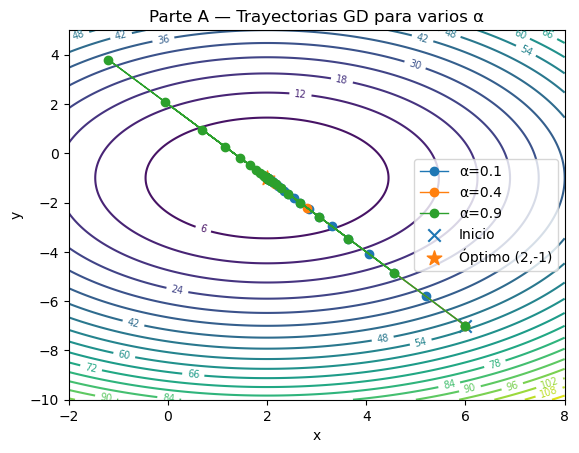

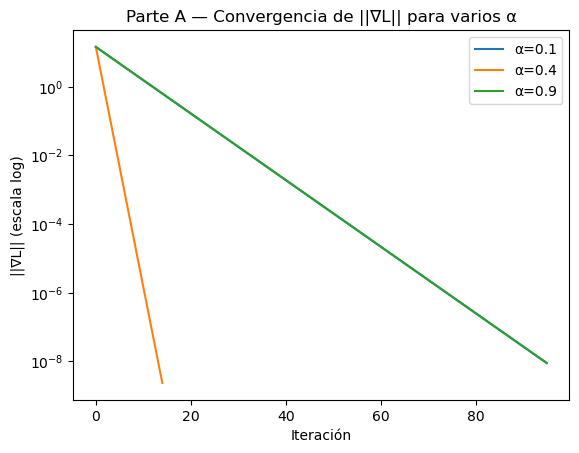

In [3]:
def L(xy):
    x, y = xy
    return (x - 2.0)**2 + (y + 1.0)**2

def gradL(xy):
    x, y = xy
    return np.array([2.0*(x - 2.0), 2.0*(y + 1.0)], dtype=float)

def run_gd(alpha, x0=(6.0, -7.0), tol=1e-8, max_iter=10_000):
    x = np.array(x0, dtype=float)
    rows = []
    k = 0
    g = gradL(x)
    rows.append((k, x[0], x[1], L(x), float(np.linalg.norm(g))))
    while float(np.linalg.norm(g)) > tol and k < max_iter:
        x = x - alpha * g
        k += 1
        g = gradL(x)
        rows.append((k, x[0], x[1], L(x), float(np.linalg.norm(g))))
    return pd.DataFrame(rows, columns=["k", "x", "y", "L", "grad_norm"])

if __name__ == "__main__":
    alphas = [0.1, 0.4, 0.9]
    x0 = (6.0, -7.0)
    results = {a: run_gd(a, x0=x0, tol=1e-8, max_iter=10_000) for a in alphas}

    X = np.linspace(-2, 8, 200)
    Y = np.linspace(-10, 5, 200)
    XX, YY = np.meshgrid(X, Y)
    ZZ = (XX - 2.0)**2 + (YY + 1.0)**2

    plt.figure()
    cs = plt.contour(XX, YY, ZZ, levels=20)
    plt.clabel(cs, inline=True, fontsize=7)
    for a, df in results.items():
        plt.plot(df["x"].values, df["y"].values, marker="o", linewidth=1, label=f"α={a}")
    plt.scatter([x0[0]], [x0[1]], marker="x", s=80, label="Inicio")
    plt.scatter([2.0], [-1.0], marker="*", s=120, label="Óptimo (2,-1)")
    plt.title("Parte A — Trayectorias GD para varios α")
    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(loc="best")
    plt.show()

    plt.figure()
    for a, df in results.items():
        plt.semilogy(df["k"].values, df["grad_norm"].values, label=f"α={a}")
    plt.xlabel("Iteración")
    plt.ylabel("||∇L|| (escala log)")
    plt.title("Parte A — Convergencia de ||∇L|| para varios α")
    plt.legend(loc="best")
    plt.show()